In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math 
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
def getData(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_NaNmean.csv')
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/valid_data_NaNmean.csv')
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values

    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]

    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

def getDataNormalization(num_samples):
    save_folder = 'train_0.5_valid_0.7_test'
    train_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_Normalization.csv')
    #X_train = train_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_train = train_data.drop(['Species'], axis = 1).values
    y_train = train_data[['Species']].copy().values
    valid_data = pd.read_csv('../data/' + save_folder + '/train_data_' + str(num_samples) + '_valid.csv')
    #X_valid = valid_data.drop(['Species', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'], axis = 1).values
    X_valid = valid_data.drop(['Species'], axis = 1).values
    y_valid = valid_data[['Species']].copy().values
    
    # label should be int
    y_train = np.floor(y_train + 1.1).astype(int)
    y_train = np.squeeze(y_train)
    n_values = np.max(y_train) + 1
    y_train = np.eye(n_values)[y_train]
    
    # label should be int
    y_valid = np.floor(y_valid + 1.1).astype(int)
    y_valid = np.squeeze(y_valid)
    n_values = np.max(y_valid) + 1
    y_valid = np.eye(n_values)[y_valid]
    return X_train, y_train, X_valid, y_valid

In [41]:

def runRandomForest(n_estimators, criterion, X_train, y_train, X_valid, y_valid):
    penguin = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion)
    penguin.fit(X_train,y_train)

    y_predict = penguin.predict(X_valid)
    y_predict = np.argmax(y_predict, axis=1)
    y_test_label = np.argmax(y_valid, axis=1)

    score = sum(y_predict==y_test_label)/y_valid.shape[0]

    # labels = ["Adelie", "Chinstrap", "Gentoo"]

    # cm = confusion_matrix(y_test_label, y_predict)

    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

    # disp.plot(cmap=plt.cm.Blues)
    # # plt.savefig('../pics/random_forest/confusion_matrix')
    # # plt.savefig('../pics/random_forest/confusion_matrix.pdf')
    # plt.show()
    return score

range(10, 101, 10)


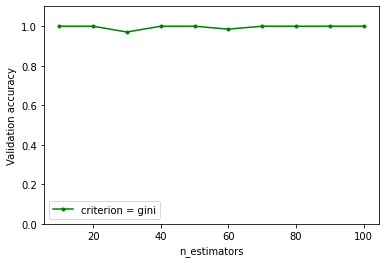

In [47]:
X_train, y_train, X_valid, y_valid = getData(50)
his_1_score = []
n_estimators = range(10, 101, 10)
print(n_estimators)
for i in n_estimators:
    his_1 = runRandomForest(i, 'gini', X_train, y_train, X_valid, y_valid)
    his_1_score.append(his_1)

plt.plot(n_estimators,his_1_score, 'g', label='criterion = gini', marker='.')
plt.xlabel('n_estimators')
plt.ylabel('Validation accuracy')
plt.ylim(0, 1.1)
plt.legend()
plt.show()